### Copy of symbolicPressureEquation.py
##### (It's a lot easier to read!!!)

Function is: 


(Theta is heaviside delayed by x)


Function in laplace domain is: 


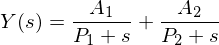

In [1]:
from sympy import *
from sympy.abc import s,t
from IPython.display import *
import numpy
import sympy

A1= Symbol("A1")
A2 = Symbol("A2")
P1 = Symbol("P1")
P2 = Symbol("P2")
Ys = Symbol("Y(s)")
Yt = Symbol("y(t)")
x = Symbol("x")

y = Function("y")(t)
u = Function("u")(t)

# Pressure equation
eq = (1-Heaviside(x))*A1*exp(-P1*t) + Heaviside(x)*A2*exp(-P2*t)
eq = A1*exp(-P1*t) + A2*exp(-P2*t)
eq = Eq(Yt, eq)

# Laplace of pressure equation
Y = A1/(s+P1) - A1*exp(-x*s)/((s+P1)) + A2*exp(-x*s)/((s+P2))
Y = A1/(s+P1) + A2/(s+P2)
de = Eq(Ys, Y)

init_printing(use_latex=True)

print("Function is: ")
display(eq)
print("(Theta is heaviside delayed by x)")
print
print
print("Function in laplace domain is: ")
display(de)

Multiplied out: 


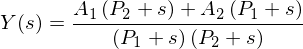

In [2]:
    # Cross multiply the fractions
    Y = together(Y)
    
    print("Multiplied out: ")
    de = Eq(Ys, Y)
    display(de)

In [3]:
    # Separate the fraction
    numerator = fraction(Y)[0]
    denominator = fraction(Y)[1]
 
    print("The numerator is:")
    display(numerator)

    print("The denominator is:")
    display(denominator)

The numerator is:


The denominator is:


Output
Converted to time domain: 


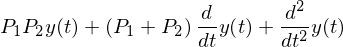

(Theta is heaviside delayed by x)


In [4]:
    # Add the fudge factor ;)
    denominator = denominator*s
    numerator = numerator*s
    
    # Expand all brackets
    denominator = denominator.expand()
    numerator = numerator.expand()
    
    # Collect powers of s
    denominator = collect(denominator, s)
    numerator = collect(numerator, s)
    
    y1 = diff(y, t)
    y2 = diff(y, t, t)
    y3 = diff(y, t, t, t)
    u1 = diff(u, t)
    u2 = diff(u, t, t)
    u3 = diff(u, t, t, t)
    
    def convert_to_time_domain(func, v, v1, v2, v3):
        time_domain = func.subs(exp(-x*s), Heaviside(x))
        time_domain = time_domain.subs(s**4, v3)
        time_domain = time_domain.subs(s**3, v2)
        time_domain = time_domain.subs(s**2, v1)
        time_domain = time_domain.subs(s, v)
        time_domain = simplify(time_domain)
        return time_domain
    
    
    LHS = convert_to_time_domain(denominator, y, y1, y2, y3)
    
    print("Output")
    print("Converted to time domain: ")
    display(LHS)
    print("(Theta is heaviside delayed by x)")

Input (impulse)
Converted to time domain: 


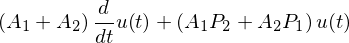

(Theta is heaviside delayed by x)


In [5]:
    RHS = convert_to_time_domain(numerator, u, u1, u2, u3)

    print("Input (impulse)")
    print("Converted to time domain: ")
    display(RHS)
    print("(Theta is heaviside delayed by x)")

Input to output


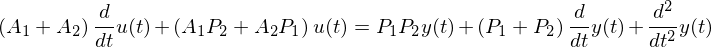

(Theta is heaviside delayed by x)


In [7]:
    print("Input to output")
    #display(Eq(RHS*Heaviside(x), LHS*Heaviside(x)))
    display(Eq(RHS, LHS))
    print("(Theta is heaviside delayed by x)")

Can find 'output(t)', set eqn to zero


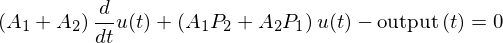

Solve for u(t)


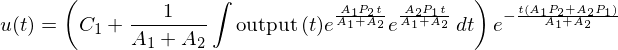

In [8]:
    q = Function("output")(t)
    eq = Eq(RHS*Heaviside(x) - q)
    eq = Eq(RHS - q)
    
    print("Can find \'output(t)\', set eqn to zero")
    display(eq)
    print("Solve for u(t)")
    ans = dsolve(eq,u)
    display(ans)

simplified


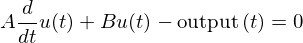

Solve for u(t)


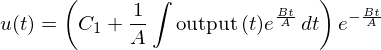

In [9]:
    a = Symbol("A")
    b = Symbol("B")
    I = a*diff(u,t) + b*u
    eq = Eq(I - q)
    
    print("simplified")
    display(eq)
    print("Solve for u(t)")
    display(dsolve(eq, u))       

Grab the RHS of equation


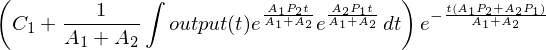

In [10]:
yt = Symbol("output(t)")
ans = ans.subs(q, yt)
b = ans.args[1]
print("Grab the RHS of equation")
display(b)

In [11]:
low_limit = Symbol("l")
high_limit = Symbol("h")

layer4 = b.args[0].args[1].args[2].args[0]
print("Layer 4")
display(layer4)

layer3 = Integral(layer4, (t, low_limit, high_limit))* b.args[0].args[1].args[1] * b.args[0].args[1].args[0]
print("Layer 3")
display(layer3)

layer2 = b.args[0].args[0] + layer3
print("Layer 2")
display(layer2)

new = layer2 * b.args[1]
print("Equation with limits on integral")
display(new)

display(b.subs({A1:0.6, A2:0.3, P1:5, P2:2, C1:0.6}))

IndexError: tuple index out of range